In [0]:
!pip install cupy-cuda100 -user

# Imports

In [8]:
import cupy as cp
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

# Wider cells
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# Make sure folder for images exist
import os
# try:
    # os.mkdir('img/task11')
# except FileExistsError as err:
#     pass

# Jupyter magic
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Autocompletion fix
# %config Completer.use_jedi=False

# T11.1 Bifurcation map is performed using cupy arrays
By using <u><i><strong>CuPy</strong></i></u>, reimplement bifurcation map (Task 1).

In [0]:
def np_fun(r, x):
    res = r*x*(1-x)
    return res

@cp.fuse()
def cp_fun(r, x):
    res = r*x*(1-x)
    return res

In [0]:
s = int(1e8)
np_r = np.linspace(0, 4, s, dtype='float32')
cp_r = cp.linspace(0, 4, s, dtype='float32')
x = np.random.rand()
cp_x = cp.float32(x)

# T11.2 Cupy bifurcation map implementation is profiled

In [4]:
%timeit np_fun(np_r, x)
%timeit cp_fun(np_r, x)
%timeit cp_fun(cp_r, x)

10 loops, best of 3: 110 ms per loop
10 loops, best of 3: 110 ms per loop
The slowest run took 8498.91 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 23.8 µs per loop


In [5]:
s = %prun -r np_fun(np_r, x)
s.print_stats();

          4 function calls in 0.118 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.118    0.118    0.118    0.118 <ipython-input-2-1736a7abcc20>:1(np_fun)
        1    0.000    0.000    0.118    0.118 <string>:1(<module>)
        1    0.000    0.000    0.118    0.118 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




In [6]:
s = %prun -r cp_fun(cp_r, x)
s.print_stats();

          3 function calls in 0.000 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




# T11.3 Graph Time( # iterations) is given. Plot cpu, mpi and cupy implementations

In [10]:
np_res = []
for s in tqdm(np.logspace(2, 7, 20)):
    s = int(s)
    np_r, np_x = np.linspace(0, 4, s).astype(np.float32), np.random.rand(s).astype(np.float32)
    t = %timeit -o -q np_fun(np_r, np_x)
    np_res.append(t)
    
cp_res = []
for s in tqdm(np.logspace(2, 7, 20)):
    s = int(s)
    cp_r, cp_x = cp.linspace(0, 4, s, dtype='f'), cp.random.rand(s, dtype='f')
    t = %timeit -o -q cp_fun(cp_r, cp_x)
    cp_res.append(t)

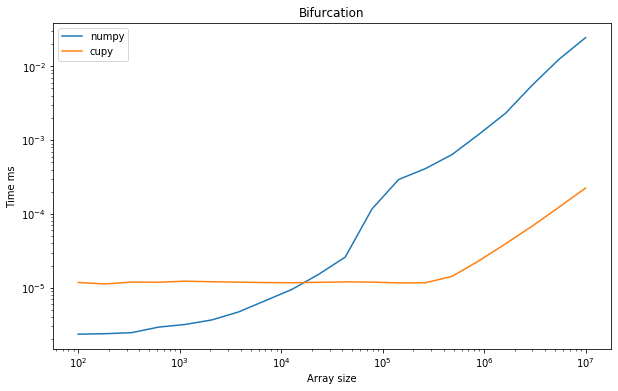

In [11]:
plt.figure(figsize=(10,6))
plt.plot(np.logspace(2, 7, 20), [i.best for i in np_res])
plt.plot(np.logspace(2, 7, 20), [i.best for i in cp_res])
plt.title('Bifurcation')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Array size')
plt.ylabel('Time ms')
plt.legend(['numpy', 'cupy']);